In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [103]:
data = pd.read_csv("data_trt.csv")
data.head()

,gender,description,stars,reduction,new_brand,avg_price,color,uni
0,femme,s3 baskets oversize -blanc- rose-bleu,0.00,0.28,s3,4.200,None,1
1,femme,capni baskets femme - tissu - noir,0.36,0.47,capni,1.599,noir,1
2,femme,love it basket femme - bleu nuit,0.50,0.50,love it,2.990,bleu,1
3,femme,s3 baskets femme - en tissu avec semelle comp...,0.45,0.35,s3,3.200,None,1
4,femme,qh shoes basket à enfiler en maille respirante...,0.00,0.29,qh shoes,3.200,blanche,1


<AxesSubplot:>

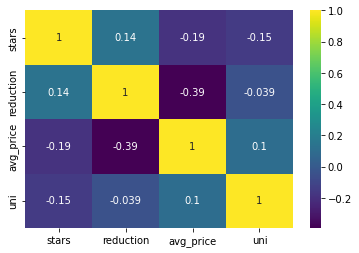

In [62]:
plt.figure()
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

<AxesSubplot:xlabel='avg_price', ylabel='Density'>

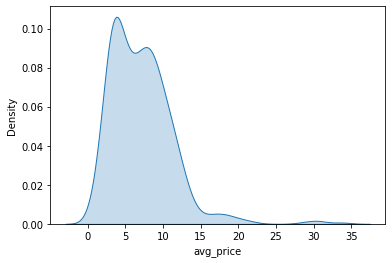

In [63]:
sns.kdeplot(data['avg_price'], fill = True) # real_price = price * 1000 \

<AxesSubplot:xlabel='stars', ylabel='Count'>

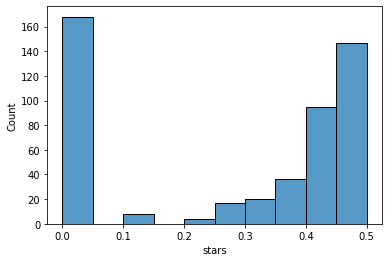

In [64]:
sns.histplot(data['stars'])

[9.68521052631579, 0, 0, 5.3999999999999995, 3.2, 2.23, 1.549, 0, 4.2, 0]
[9.050213333333334, 7.0995, 9.183333333333334, 0, 0, 0, 0, 7.6, 0, 4.276818181818182]


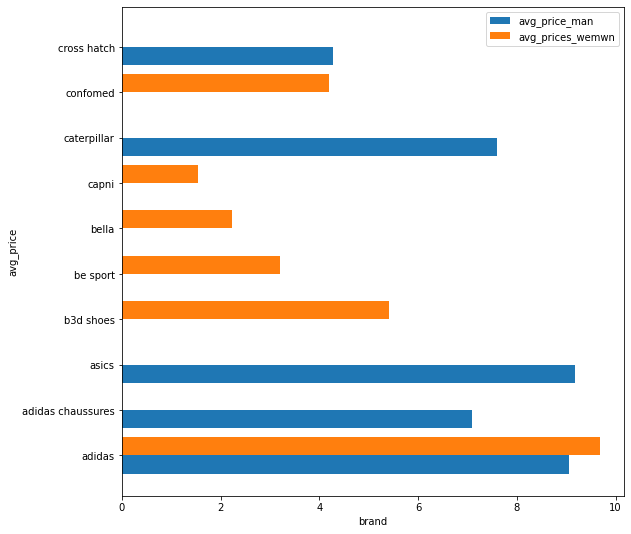

In [101]:
brand_selected = list(np.unique(data['new_brand']))[:10]
avg_prices_men = []
avg_prices_wemen = []
axis_x = np.arange(len(brand_selected))
for b in brand_selected:
    p1 = (data["new_brand"] == b )& (data['gender'] == "homme")
    p2 = (data["new_brand"] == b) & (data['gender'] == "femme")
    x = 0 if data[p1]["avg_price"].values.size == 0 else data[p1]["avg_price"].values.mean()
    y = 0 if data[p2]["avg_price"].values.size == 0 else data[p2]["avg_price"].values.mean()    
    
    avg_prices_men.append(x)
    avg_prices_wemen.append(y)

print(avg_prices_wemen)
print(avg_prices_men)
fig = plt.figure(figsize=(9, 9))
plt.barh(axis_x - 0.2, avg_prices_men,0.4, label = "avg_price_man")
plt.barh(axis_x + 0.2, avg_prices_wemen,0.4,  label = "avg_prices_wemwn")
plt.yticks(axis_x, brand_selected)
plt.xlabel("brand")
plt.ylabel("avg_price")
# plt.title("Number of Students in each group")
plt.legend()

<BarContainer object of 10 artists>

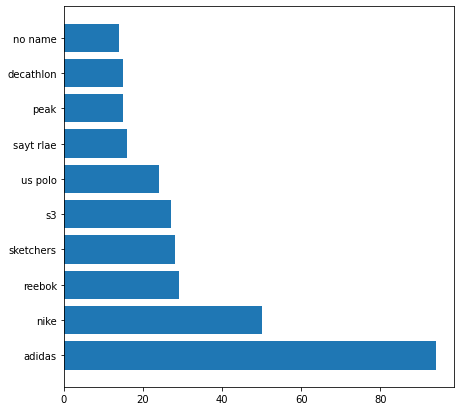

In [49]:
new_brand = data['new_brand'].value_counts()
new_brand = new_brand[:10]
plt.figure(figsize=(7, 7))
plt.barh(new_brand.index, new_brand.values)

In [142]:
# text = " ".join([ele for ele in data["description"].values])
# stop_words = set(stopwords.words('french'))
# stop_words.add("noir")

wordcloud = WordCloud(background_color= "white", 
                    max_words= 500, 
                    width = 1400, 
                    height = 900,
                    colormap="tab10",
                    stopwords= stop_words)
wordcloud.generate(text)


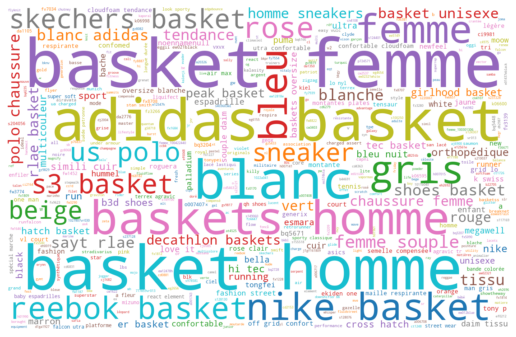

In [143]:

# Display the generated image:
plt.figure(figsize= (9,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
p = data['new_brand'].isin(['confomed', 'er', 'sketchers'])
data[p]

,gender,description,stars,reduction,new_brand,avg_price,color,uni
9,femme,skechers basket femme - s128130/ccpr - gris,0.50,0.43,sketchers,7.700,gris,1
31,femme,skechers basket femme - s128076/nvmt - bleu,0.50,0.00,sketchers,9.500,bleu,1
41,femme,skechers basket femme - s149060/bkpr - multico...,0.00,0.25,sketchers,7.900,None,1
58,femme,er basket femme à platforme - orange / blanc,0.45,0.36,er,2.190,blanc orange,0
65,femme,er basket femme à platforme - jaune / blanc,0.47,0.36,er,2.170,blanc jaune,0
68,femme,skechers basket femme - s155518/mlt - multicou...,0.10,0.00,sketchers,11.900,None,1
74,femme,confomed basket femme - souple et orthopédique...,0.00,0.00,confomed,4.200,rose,1
104,femme,skechers basket femme - s124401/mve - mauve,0.00,0.00,sketchers,11.900,mauve,1
112,femme,skechers basket pour femme confortable - go ru...,0.50,0.36,sketchers,7.999,noir,1
119,femme,confomed basket femme - souple et orthopédique...,0.43,0.00,confomed,4.200,None,1
